A.1.4 Per type (Noisy Probabilistic Ending Tournament)
-----------

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tools

%matplotlib inline

In [2]:
import itertools

In [3]:
font = {'weight': 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

noisy probend tournaments
-------------------------

In [4]:
noisy_probend_tournaments = pd.read_csv('data/raw_noise_probend.csv')

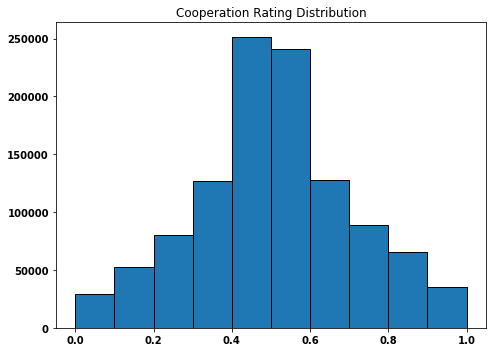

In [6]:
figure = plt.figure(figsize=(7, 5))
plt.hist(noisy_probend_tournaments['Cooperation_rating'], edgecolor='black');
plt.title('Cooperation Rating Distribution');
plt.tight_layout()
plt.savefig('../images/cooperation_distribution_noise_probend.pdf')

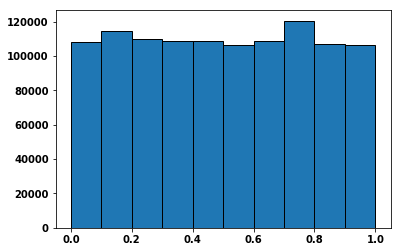

In [8]:
plt.hist(noisy_probend_tournaments['probend'], edgecolor='black');

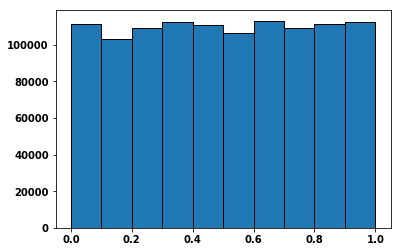

In [9]:
plt.hist(noisy_probend_tournaments['noise'], edgecolor='black');

In [7]:
winners = noisy_probend_tournaments[noisy_probend_tournaments['Rank'] == 0]

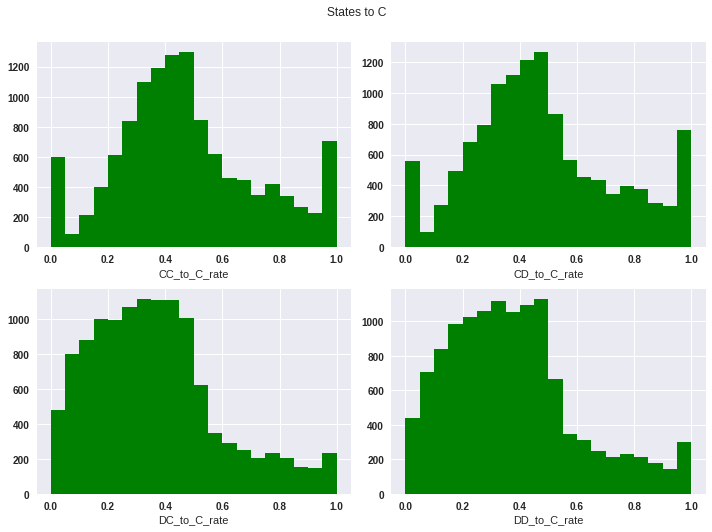

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
fig.suptitle('States to C', y=1.05)

for index, label in zip(itertools.product((0, 1), repeat=2),
                        ['CC_to_C_rate', 'CD_to_C_rate', 'DC_to_C_rate', 'DD_to_C_rate']):
    axes[index[0]][index[1]].hist(winners[label], bins=20, color='green'); 
    axes[index[0]][index[1]].set_xlabel(label)

plt.tight_layout()
plt.show()

In [9]:
losers = noisy_probend_tournaments.loc[noisy_probend_tournaments.groupby(['seed'], sort=False)['Rank'].idxmax()]

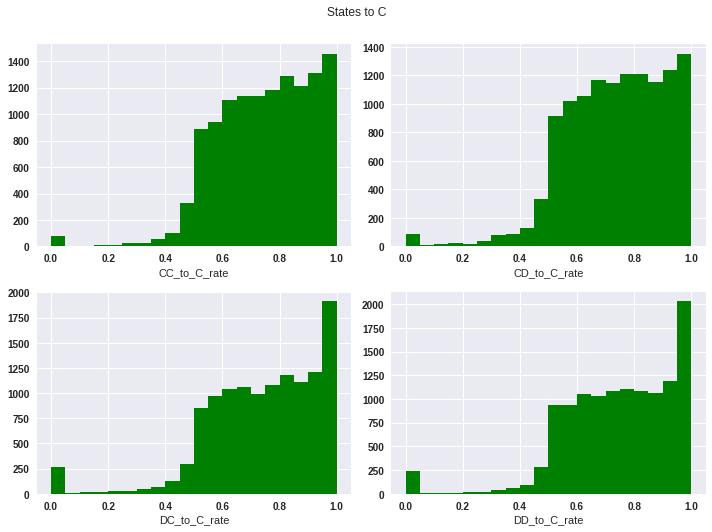

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
fig.suptitle('States to C', y=1.05)

for index, label in zip(itertools.product((0, 1), repeat=2),
                        ['CC_to_C_rate', 'CD_to_C_rate', 'DC_to_C_rate', 'DD_to_C_rate']):
    axes[index[0]][index[1]].hist(losers[label], bins=20, color='green'); 
    axes[index[0]][index[1]].set_xlabel(label)

plt.tight_layout()
plt.show()

Fixed data set
--------------

In [11]:
df, name = pd.read_csv('data/noisy probend_tournaments.csv'), 'noisy probend'

**V. $r$ distribution**

/home/nightwing/anaconda3/envs/axlml/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


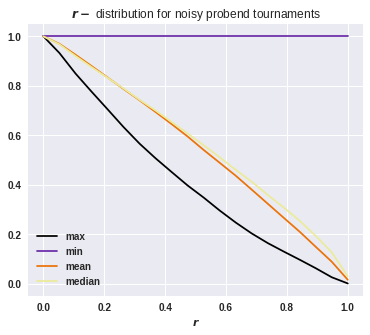

In [12]:
tools.r_distribution(df['winner coop'], df['max coop'], df['min coop'], df['mean coop'], 
                     df['median coop'], title='$r-$ distribution for {} tournaments'.format(name))

The noise seems to have to effect on the probend noisy tournaments. The best performing strategy woul be the strategy that follows a similar approach to a probabilistic enviroment.

In [11]:
noisy_probend_tournaments['Normalized_Rank'] = noisy_probend_tournaments.apply(lambda row: row['Rank'] / (row['size'] - 1), axis=1)
top = noisy_probend_tournaments[noisy_probend_tournaments['Normalized_Rank'] <=0.5]
low = noisy_probend_tournaments[noisy_probend_tournaments['Normalized_Rank'] >0.5]

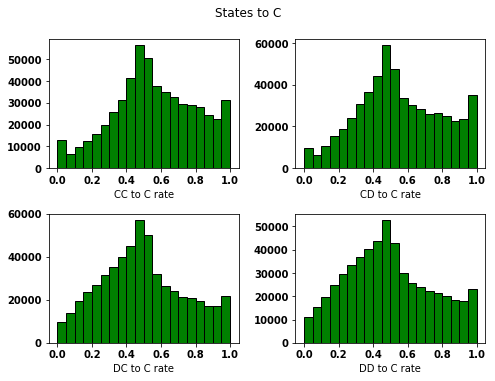

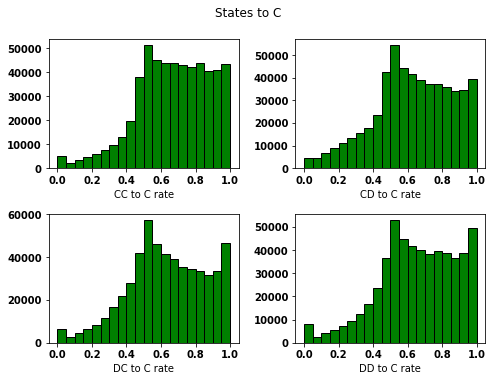

In [12]:
for dset in [top, low]:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))
    fig.suptitle('States to C', y=1.05)

    for index, label in zip(itertools.product((0, 1), repeat=2),
                            ['CC_to_C_rate', 'CD_to_C_rate', 'DC_to_C_rate', 'DD_to_C_rate']):
        axes[index[0]][index[1]].hist(dset[label], bins=20, color='green', edgecolor='black'); 
        axes[index[0]][index[1]].set_xlabel(label.replace('_', ' '))

    plt.tight_layout()